In [25]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import networkx as nx
import decimal

In [26]:
fname = '../src/sf/open-data-day-2019-campaign-finance.csv'

# instantiate the graph
dgraph = nx.DiGraph()

for row in csv.DictReader(open(fname, 'r'), delimiter=',', quotechar='"'):
    # Clean up the data
    if row['tran_namf'] != '':
        doner = f"{row['tran_namf']} {row['tran_naml']}"
    else:
        doner = row['tran_naml']
    donee = row['filer_naml']
    amount = decimal.Decimal(row['tran_amt1'].replace("$","").replace(",",""))
    
    # create a new edge if it doesn't exist yet
    if not dgraph.has_edge(doner, donee):
        dgraph.add_edge(doner, donee, amount = amount)
    else:
        # increment the amount
        dgraph[doner][donee]['amount'] += amount


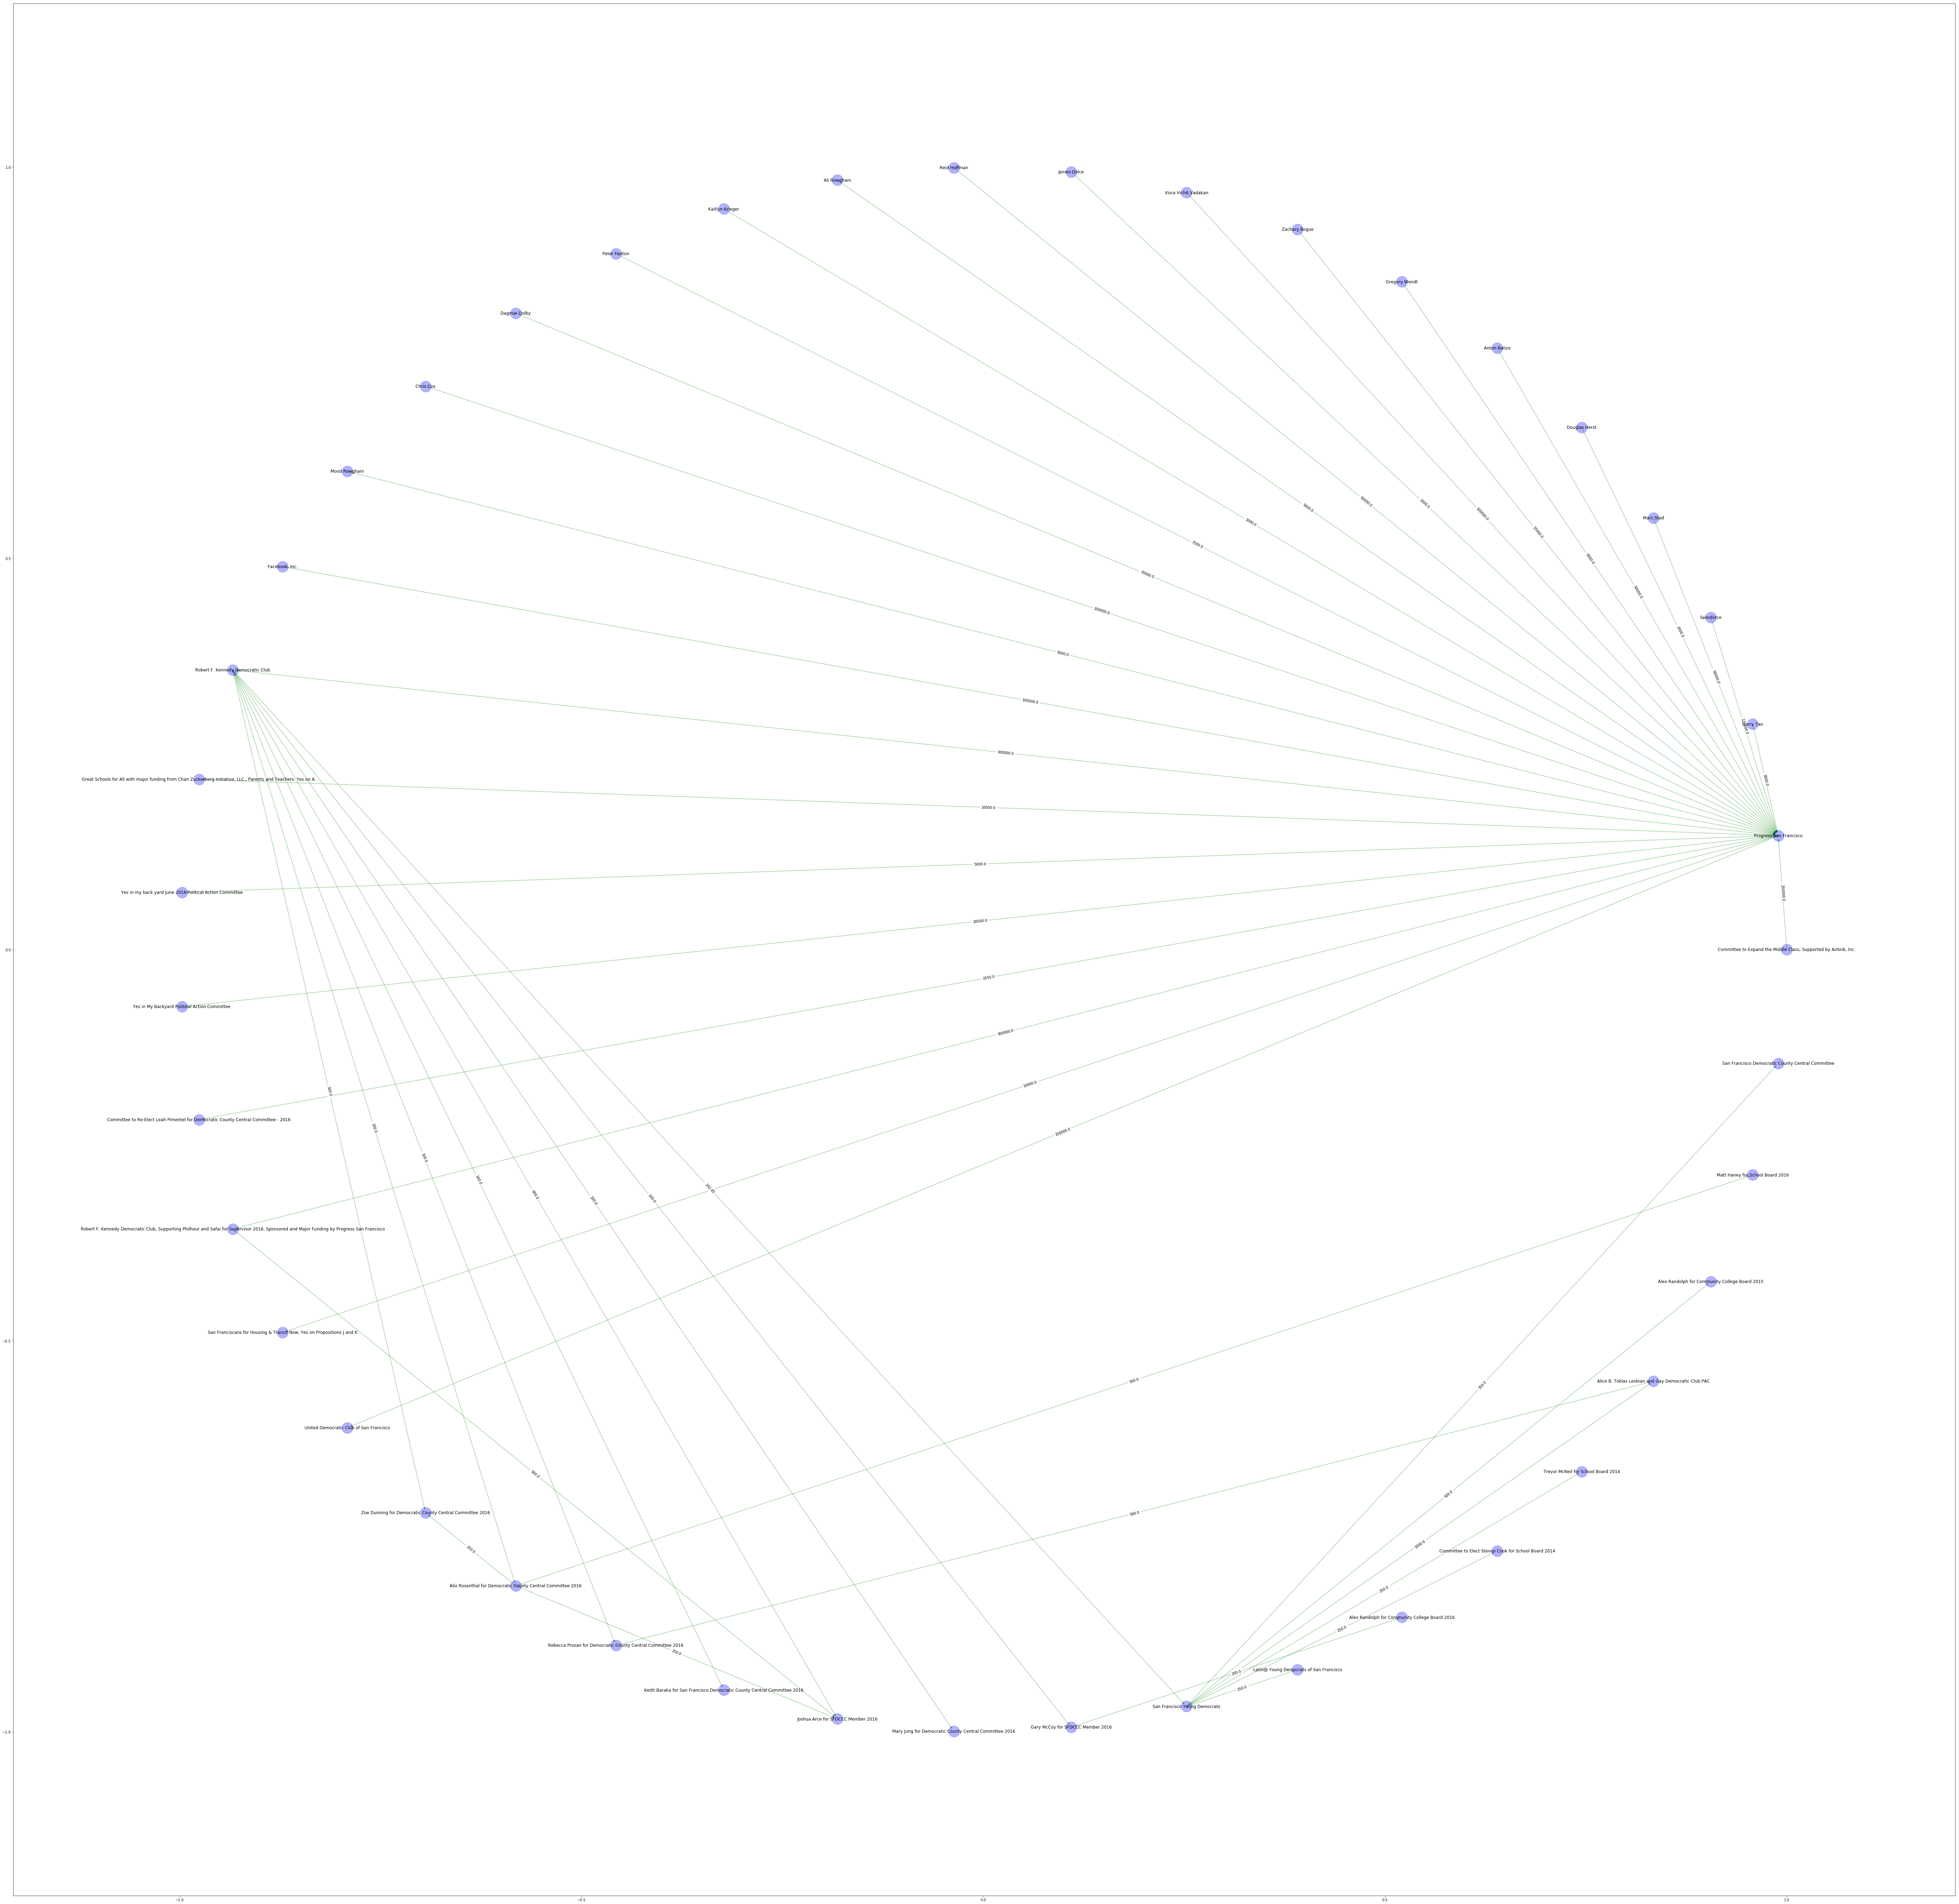

In [28]:
# do some viz formatting 
graph_pos = nx.shell_layout(dgraph)
plt.figure(3,figsize=(100,100)) 
nx.draw_networkx_nodes(dgraph, graph_pos, node_size=1000, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(dgraph, graph_pos, width=2, alpha=0.3, edge_color='green')
nx.draw_networkx_labels(dgraph, graph_pos, font_size=12, font_family='sans-serif')

labels = range(len(dgraph))
edge_labels={(u, v): d["amount"] for u, v, d in dgraph.edges(data=True)}
nx.draw_networkx_edge_labels(dgraph, graph_pos, edge_labels=edge_labels)

# show the graph -- (takes a minute)
plt.show()